In [71]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
# read dataset
df= pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Let's check if there is any missing values in the data

In [73]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing values in our data

Let's have more information about the dateset and check the statiscal analysis of the data

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [75]:
df.duplicated().sum()

0

In [76]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Interpretation: 
* The Outcome shows a minimum values equal to 0 and max=1, this will a binary classification problem
* The minimum of features like Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI are 0 and the maximum values are continous values
* The age of persons varies from 21 to 81, it means diabetes are more detected in adults people

### Exploratory Data Analysis (EDA)

In [77]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<AxesSubplot:>

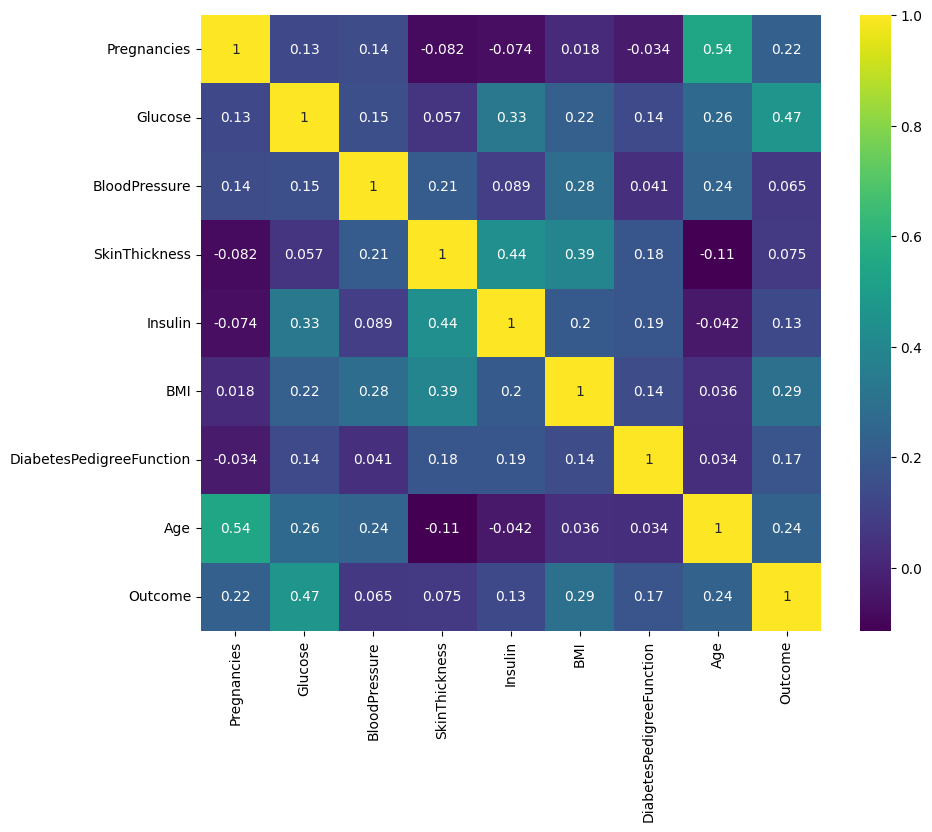

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [79]:
from ydata_profiling import ProfileReport
profile= ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<b>The report genetareted by pandas profiling contains all the necessary visualizations about our dataset</b>

In [80]:
y= df.Outcome
X=df.drop('Outcome', axis=1)

In [81]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* 0 represent Non diabetic persons
* 1 represent diabetic persons

<AxesSubplot:xlabel='Outcome', ylabel='count'>

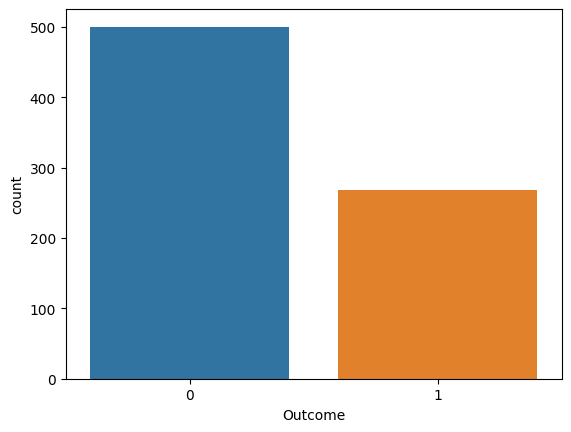

In [82]:
sns.countplot(df, x='Outcome')

In [83]:
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

<AxesSubplot:xlabel='Age', ylabel='count'>

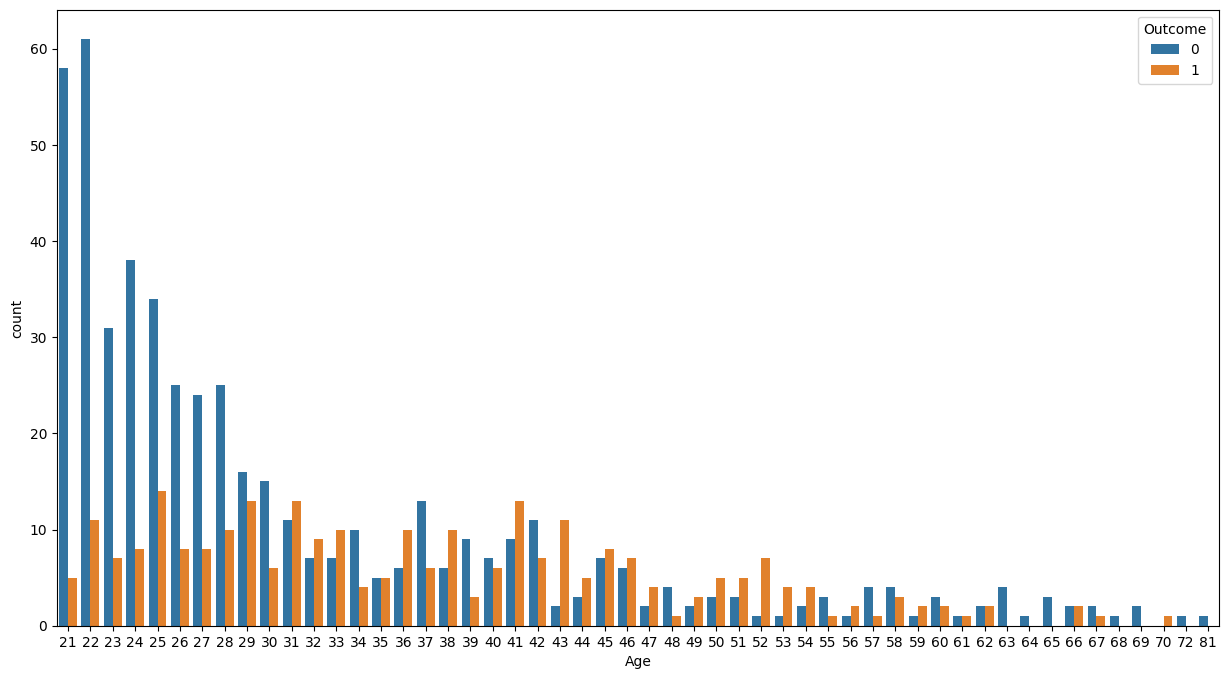

In [84]:
plt.figure(figsize=(15, 8))
sns.countplot(df, x='Age', hue='Outcome')

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [86]:
X_train.shape

(614, 8)

In [87]:
X_test.shape

(154, 8)

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
# X_train= pd.DataFrame(X_train, columns= df.columns)
# X_train

### Model Building

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [91]:
lr_clf= LogisticRegression()
svm_clf= SVC(kernel='linear')
nb_clf= BernoulliNB()
knn_clf= KNeighborsClassifier()
rf_clf= RandomForestClassifier(random_state=1000)
xgb_clf= XGBClassifier() 

In [92]:
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [93]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [94]:
nb_clf.fit(X_train, y_train)

BernoulliNB()

In [95]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

In [97]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Model evaluation

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
y_pred1= lr_clf.predict(X_test)

In [100]:
accuracy_score(y_test, y_pred1)

0.7142857142857143

In [101]:
y_pred2= svm_clf.predict(X_test)
accuracy_score(y_test, y_pred2)

0.7207792207792207

In [102]:
y_pred3= nb_clf.predict(X_test)
accuracy_score(y_test, y_pred3)

0.7012987012987013

In [103]:
y_pred4= knn_clf.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7012987012987013

In [104]:
y_pred5= rf_clf.predict(X_test)
accuracy_score(y_test, y_pred5)

0.7662337662337663

In [105]:
y_pred6= xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred6)

0.7532467532467533

### HyperParmterTuning

In [106]:
import numpy as np
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1, 1, 10],  
            #'gamma': [1, 0.1, 0.01],
            #'C': [1,10,20],
            'kernel': ['linear']
        }  
    },
     'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [10,7,15],
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=1234),
        'params' : {
            #'n_estimators': [1,5,10],
            'n_estimators': [25, 50, 100, 150], 
            'max_features': ['sqrt', 'log2', None], 
            'max_depth': [3, 6, 9]
        }
    },
    'xg_boost': {
        'model': XGBClassifier(random_state=1234),
        'params' : {
            'n_estimators': [1,5,10],
        }
    },
    
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10,15],
            #'C' : np.logspace(-4, 4, 20),
            'n_jobs': [-1, 10, 15]
            #'penalty' : ['l1', 'l2', 'none']
        }
    }
}

In [107]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score  \
0                  svm    0.778529   
1                  knn    0.750860   
2        random_forest    0.780195   
3             xg_boost    0.747608   
4  logistic_regression    0.778529   

                                         best_params  
0                     {'C': 0.1, 'kernel': 'linear'}  
1                                 {'n_neighbors': 7}  
2  {'max_depth': 6, 'max_features': 'log2', 'n_es...  
3                                {'n_estimators': 5}  
4                             {'C': 1, 'n_jobs': -1}

In [111]:
model1= LogisticRegression(C= 1, n_jobs=-1)
model1.fit(X_train, y_train)
y_pred_lr= model1.predict(X_test)

In [112]:
print("The training score with LogisticRegression is:", model1.score(X_train, y_train))
print("The test score with LogisticRegression is:", model1.score(X_test, y_test))

The training score with LogisticRegression is: 0.7915309446254072
The test score with LogisticRegression is: 0.7142857142857143


In [140]:
#from xgboost import XGBClassifier
#model2= XGBClassifier(max_depth=9)
model2= RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=15)
model2.fit(X_train, y_train)
y_pred_rf= model2.predict(X_test)
print("The training score with RandomForest is:", model2.score(X_train, y_train))
print("The test score with RandomForest is:", model2.score(X_test, y_test))

The training score with RandomForest is: 0.9071661237785016
The test score with RandomForest is: 0.7077922077922078


In [141]:
model3= SVC(C= 0.1,kernel='linear')
model3.fit(X_train, y_train)
y_pred_svm= model3.predict(X_test)
print("The training score with SVM is:", model3.score(X_train, y_train))
print("The test score with SVM is:", model3.score(X_test, y_test))

The training score with SVM is: 0.7833876221498371
The test score with SVM is: 0.7207792207792207


In [142]:
#from xgboost import XGBClassifier
#model2= XGBClassifier(max_depth=9)
model4= XGBClassifier(max_depth=6, n_estimators=15)
model4.fit(X_train, y_train)
y_pred_xgb= model4.predict(X_test)
print("The training score with Xgboost is:", model4.score(X_train, y_train))
print("The test score with Xgboost is:", model4.score(X_test, y_test))

The training score with Xgboost is: 0.9609120521172638
The test score with Xgboost is: 0.7727272727272727


Confusion matrix of Random Forest Model


<AxesSubplot:>

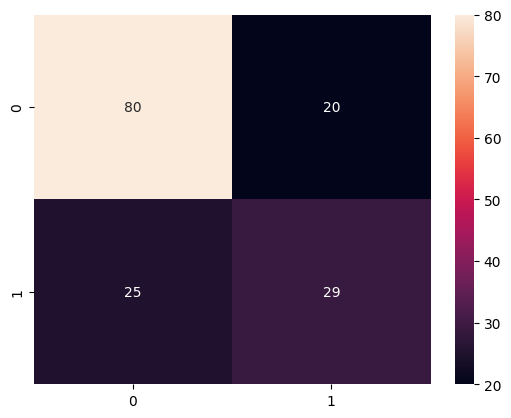

In [144]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion matrix of Random Forest Model")
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True)

Confusion matrix of XGBoost Model


<AxesSubplot:>

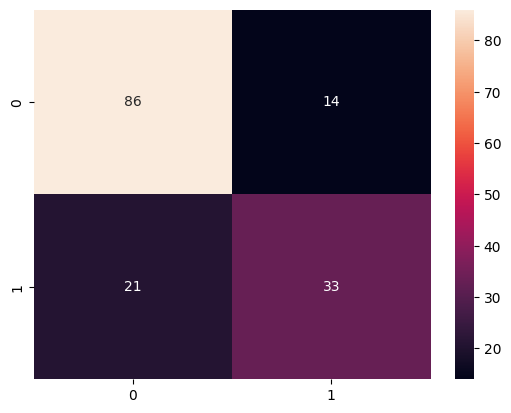

In [139]:
print("Confusion matrix of XGBoost Model")

sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True)

In [146]:
print("Classificatio_report for XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classificatio_report for XGBoost
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [151]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(model4, open(filename, 'wb'))

In [154]:
# loading the saved model
loaded_model = pickle.load(open('mymodels/diabetes_model.sav', 'rb'))

In [155]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic
